#### Import library, load dataset, dan cek dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('data/dataset_cbs_ts.csv', parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318 entries, 0 to 3317
Data columns (total 13 columns):
date           3318 non-null object
month          3318 non-null int64
year           3318 non-null int64
holiday        3318 non-null int64
workingday     3318 non-null int64
weekday        3318 non-null int64
season         3318 non-null int64
temperature    3318 non-null int64
windspeed      3318 non-null int64
humidity       3318 non-null float64
casual         3318 non-null int64
registered     3318 non-null int64
total          3318 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 337.1+ KB


In [4]:
df.head()

,date,month,year,holiday,workingday,weekday,season,temperature,windspeed,humidity,casual,registered,total
0,2010-09-20,9,2010,0,1,0,3,23,17,0.47,34,178,212
1,2010-09-21,9,2010,0,1,1,3,20,10,0.52,109,215,324
2,2010-09-22,9,2010,0,1,2,3,26,15,0.60,117,260,377
3,2010-09-23,9,2010,0,1,3,3,27,8,0.64,124,249,373
4,2010-09-24,9,2010,0,1,4,3,29,15,0.60,156,206,362


In [5]:
df.describe()

,month,year,holiday,workingday,weekday,season,temperature,windspeed,humidity,casual,registered,total
count,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000,3318.000000
mean,6.575949,2014.771248,0.030440,0.714888,2.997288,2.493369,15.303797,13.723930,0.636275,1606.927667,6117.928571,7724.856239
std,3.440890,2.650440,0.171821,0.451536,1.999621,1.110608,9.484573,5.343355,0.147003,1513.868218,2956.782305,3882.272026
min,1.000000,2010.000000,0.000000,0.000000,0.000000,1.000000,-10.000000,0.000000,0.190000,2.000000,19.000000,21.000000
25%,4.000000,2012.000000,0.000000,0.000000,1.000000,2.000000,7.000000,10.000000,0.530000,475.250000,3783.250000,4554.250000
50%,7.000000,2015.000000,0.000000,1.000000,3.000000,3.000000,16.000000,13.000000,0.640000,1175.000000,6074.000000,7561.500000
75%,10.000000,2017.000000,0.000000,1.000000,5.000000,3.000000,24.000000,17.000000,0.750000,2253.500000,8471.500000,11037.500000
max,12.000000,2019.000000,1.000000,1.000000,6.000000,4.000000,34.000000,44.000000,0.990000,10173.000000,15419.000000,19113.000000


In [6]:
df.isna().sum()

date           0
month          0
year           0
holiday        0
workingday     0
weekday        0
season         0
temperature    0
windspeed      0
humidity       0
casual         0
registered     0
total          0
dtype: int64

In [7]:
df.columns

Index(['date', 'month', 'year', 'holiday', 'workingday', 'weekday', 'season',
       'temperature', 'windspeed', 'humidity', 'casual', 'registered',
       'total'],
      dtype='object')

### Pertanyaan

1. Bagaimana perubahan suhu dari musim ke musim? Berapa rata-rata suhu setiap musim?
2. Apakah informasi cuaca berkolerasi dengan total peminjaman sepeda?
3. Apakah hari libur dan hari kerja berkolerasi dengan total peminjaman sepeda?
4. Berapa rata-rata suhu, kecepatan angin, kelembapan, dan total peminjaman sepeda setiap bulan?

### Analisis

#### 1. Bagaimana perubahan suhu dari musim ke musim? Berapa rata-rata suhu setiap musim?

Informasi:<br>
1: Spring<br>
2: Summer<br>
3: Fall<br>
4: Winter<br>

In [8]:
season = ['Spring','Summer','Fall','Winter']

for i in range(len(season)):
    print(season[i])
    print('Mean temperature: {:0.2f}'.format(df[df['season'] == i+1]['temperature'].mean()))
    print('Median temperature: {:0.2f}'.format(df[df['season'] == i+1]['temperature'].median()))
    print('Std temperature: {:0.2f}'.format(df[df['season'] == i+1]['temperature'].std()))
    print('Min temperature: {:0.2f}'.format(df[df['season'] == i+1]['temperature'].min()))
    print('Max temperature: {:0.2f}'.format(df[df['season'] == i+1]['temperature'].max()))
    print('-'*34)
    

Spring
Mean temperature: 14.34
Median temperature: 15.00
Std temperature: 6.76
Min temperature: -5.00
Max temperature: 30.00
----------------------------------
Summer
Mean temperature: 26.05
Median temperature: 26.00
Std temperature: 2.72
Min temperature: 16.00
Max temperature: 34.00
----------------------------------
Fall
Mean temperature: 16.03
Median temperature: 16.00
Std temperature: 6.91
Min temperature: -1.00
Max temperature: 30.00
----------------------------------
Winter
Mean temperature: 4.44
Median temperature: 4.00
Std temperature: 5.21
Min temperature: -10.00
Max temperature: 20.00
----------------------------------


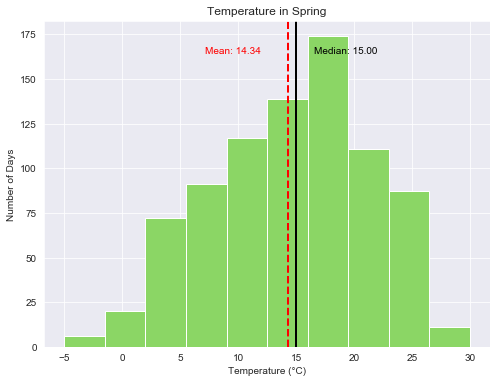

In [9]:
plt.figure(figsize=(8,6))
plt.title('Temperature in Spring')
plt.hist(df[df['season']==1]['temperature'], color='#8bd665')

plt.axvline(df[df['season']==1]['temperature'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df[df['season']==1]['temperature'].median(), color='k', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(df[df['season']==1]['temperature'].mean()*0.5, max_ylim*0.9, 'Mean: {:.2f}'.format(df[df['season']==1]['temperature'].mean()),c='r')

plt.text(df[df['season']==1]['temperature'].median()*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(df[df['season']==1]['temperature'].median()),c='k')

plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Days')

plt.show()

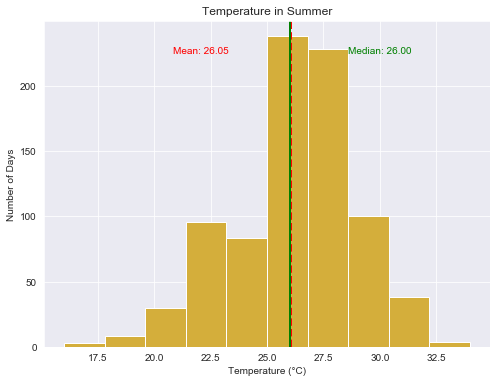

In [10]:
plt.figure(figsize=(8,6))
plt.title('Temperature in Summer')
plt.hist(df[df['season']==2]['temperature'], color='#d4ae3b')

plt.axvline(df[df['season']==2]['temperature'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df[df['season']==2]['temperature'].median(), color='g', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(df[df['season']==2]['temperature'].mean()*0.8, max_ylim*0.9, 'Mean: {:.2f}'.format(df[df['season']==2]['temperature'].mean()),c='r')

plt.text(df[df['season']==2]['temperature'].median()*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(df[df['season']==2]['temperature'].median()),c='g')


plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Days')

plt.show()

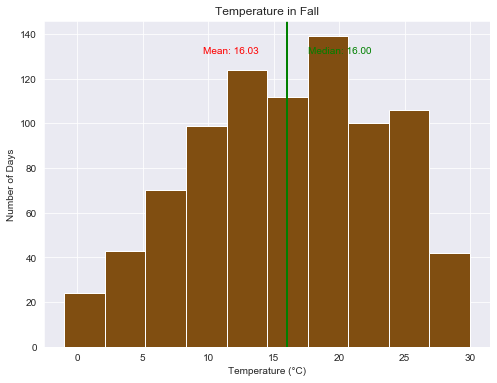

In [11]:
plt.figure(figsize=(8,6))
plt.title('Temperature in Fall')
plt.hist(df[df['season']==3]['temperature'], color='#804e11')

plt.axvline(df[df['season']==3]['temperature'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df[df['season']==3]['temperature'].median(), color='g', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(df[df['season']==3]['temperature'].mean()*0.6, max_ylim*0.9, 'Mean: {:.2f}'.format(df[df['season']==3]['temperature'].mean()),c='r')

plt.text(df[df['season']==3]['temperature'].median()*1.1, max_ylim*0.9, 'Median: {:.2f}'.format(df[df['season']==3]['temperature'].median()),c='g')


plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Days')

plt.show()

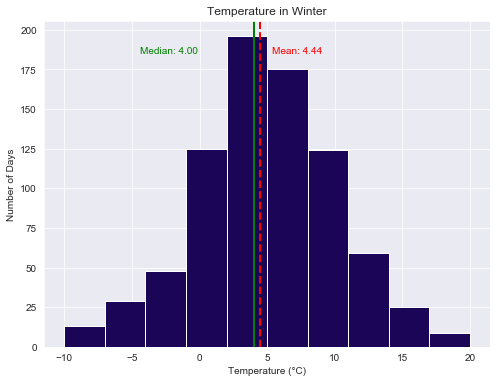

In [12]:
plt.figure(figsize=(8,6))
plt.title('Temperature in Winter')
plt.hist(df[df['season']==4]['temperature'], color='#1a0557')

plt.axvline(df[df['season']==4]['temperature'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df[df['season']==4]['temperature'].median(), color='g', linewidth=2)

min_ylim, max_ylim = plt.ylim()
plt.text(df[df['season']==4]['temperature'].mean()*1.2, max_ylim*0.9, 'Mean: {:.2f}'.format(df[df['season']==4]['temperature'].mean()),c='r')

plt.text(df[df['season']==4]['temperature'].median()*-1.1, max_ylim*0.9, 'Median: {:.2f}'.format(df[df['season']==4]['temperature'].median()),c='g')


plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Days')

plt.show()

#### Temuan

Berdasarkan analisis pertanyaan pertama, temperature sangat tinggi pada saat Summer. Mean temperature terendah terdapat di Winter (mean: 4.44, standard deviasi: 5.21) dan mean temperature tertinggi terdapat di Summer (mean: 26.05, standard deviasi: 2.72). Di antaranya terdapat Spring (mean: 14.34, standard deviasi: 6.76) dan Fall (mean: 16.03, standard deviasi: 6.91). Karena temperature yang rendah di Winter, temperature yang cukup hangat di Spring dan Fall), serta temeperature yang hangat di Summer, semestinya temperature mempengaruhi jumlah sepeda yang disewa.

#### Rata-rata user (casual/member) per tahun berdasarkan season (time series)

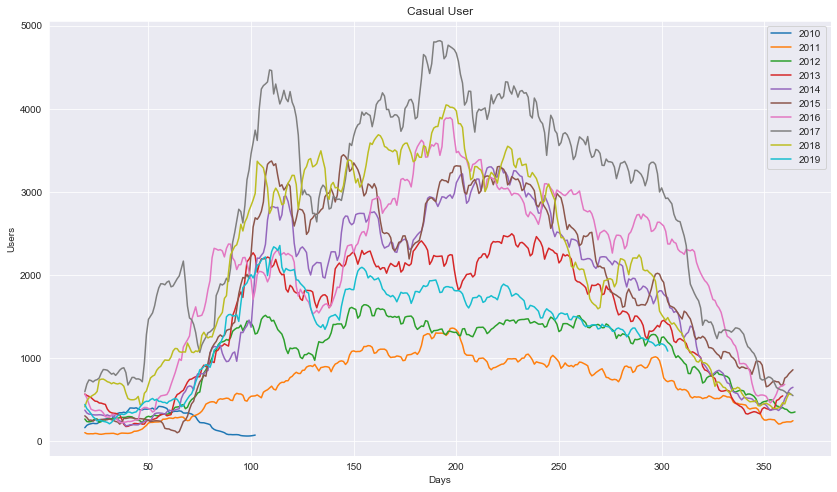

In [13]:
plt.figure(figsize =(14,8))

for i in pd.unique(df['year']):
    df_temp = df[df['year']==i]
    # menggunakan centered smoothing average agar seasonality-nya terlihat
    plt.plot(df_temp['casual'].reset_index()['casual'].rolling(window = 20).mean())

plt.legend(pd.unique(df['year']))
plt.title('Casual User')
plt.xlabel('Days')
plt.ylabel('Users')

plt.show()

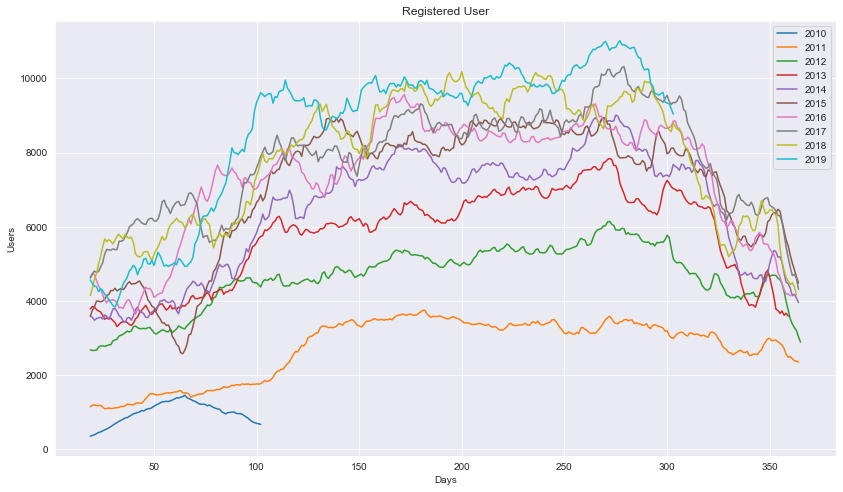

In [14]:
plt.figure(figsize =(14,8))

for i in pd.unique(df['year']):
    df_temp = df[df['year']==i]
    # menggunakan centered smoothing average agar seasonality-nya terlihat
    plt.plot(df_temp['registered'].reset_index()['registered'].rolling(window = 20).mean())

plt.legend(pd.unique(df['year']))
plt.title('Registered User')
plt.xlabel('Days')
plt.ylabel('Users')

plt.show()

#### Temuan

Season cukup tidak berpengaruh terhadap rata-rata pengguna member.

#### 2. Apakah informasi cuaca berkolerasi dengan total peminjaman sepeda?

In [15]:
df.head()

,date,month,year,holiday,workingday,weekday,season,temperature,windspeed,humidity,casual,registered,total
0,2010-09-20,9,2010,0,1,0,3,23,17,0.47,34,178,212
1,2010-09-21,9,2010,0,1,1,3,20,10,0.52,109,215,324
2,2010-09-22,9,2010,0,1,2,3,26,15,0.60,117,260,377
3,2010-09-23,9,2010,0,1,3,3,27,8,0.64,124,249,373
4,2010-09-24,9,2010,0,1,4,3,29,15,0.60,156,206,362


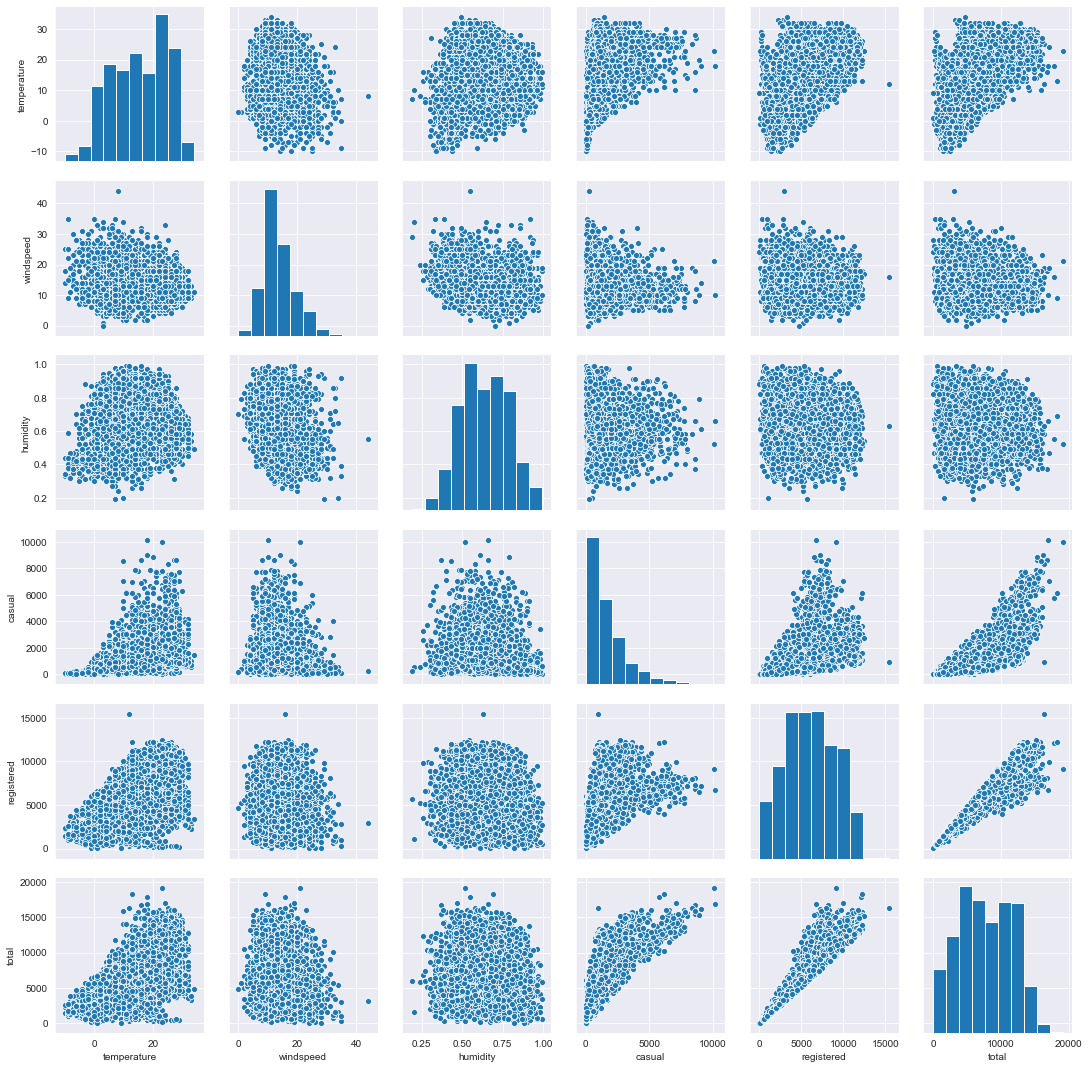

In [16]:
sns.pairplot(df[['temperature', 'windspeed', 'humidity', 'casual', 'registered', 'total']])

In [17]:
corr_cols = ['temperature','windspeed','humidity']

for i in corr_cols:
    print('Correlation {} to casual, member, and total'.format(i))
    print('Score Casual: {:0.3f}'.format(df[i].corr(df['casual'])))
    print('Score Member: {:0.3f}'.format(df[i].corr(df['registered'])))
    print('Score Total: {:0.3f}'.format(df[i].corr(df['total'])))
    print('-'*40)

Correlation temperature to casual, member, and total
Score Casual: 0.528
Score Member: 0.534
Score Total: 0.612
----------------------------------------
Correlation windspeed to casual, member, and total
Score Casual: -0.118
Score Member: -0.105
Score Total: -0.126
----------------------------------------
Correlation humidity to casual, member, and total
Score Casual: -0.041
Score Member: -0.024
Score Total: -0.034
----------------------------------------


#### Temuan

Berdasarkan analisis pertanyaan kedua, hanya temperature yang memiliki nilai korelasi positif dengan jumlah sepeda yang disewa--baik pengguna member ataupun casual. Hal tersebut menandakan bahwa temperature mempengaruhi jumlah sepeda yang disewa.

#### 3. Apakah hari libur dan hari kerja berkolerasi dengan jumlah peminjaman sepeda?

In [18]:
corr_cols = ['holiday','workingday']

for i in corr_cols:
    print('Correlation {} to casual, registered, and total'.format(i))
    print('Score casual: {:0.3f}'.format(df[i].corr(df['casual'])))
    print('Score member: {:0.3f}'.format(df[i].corr(df['registered'])))
    print('Score total: {:0.3f}'.format(df[i].corr(df['total'])))
    print('-'*40)

Correlation holiday to casual, registered, and total
Score casual: 0.030
Score member: -0.119
Score total: -0.079
----------------------------------------
Correlation workingday to casual, registered, and total
Score casual: -0.404
Score member: 0.271
Score total: 0.049
----------------------------------------


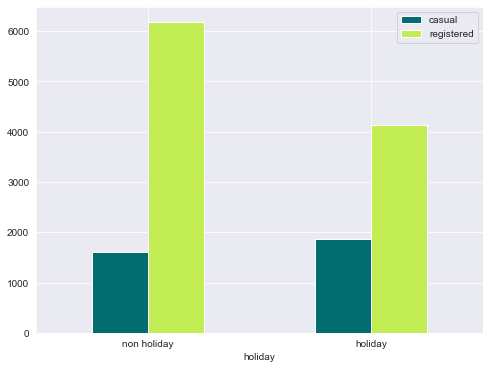

In [19]:
agg_holy = df[['casual', 'registered', 'holiday']].groupby('holiday').mean()
agg_holy.plot(kind = 'bar', figsize = (8,6), color = ['#026c6e', '#c2ed55']) 
plt.xticks(range(2), ['non holiday', 'holiday'], rotation = 0)

plt.show()

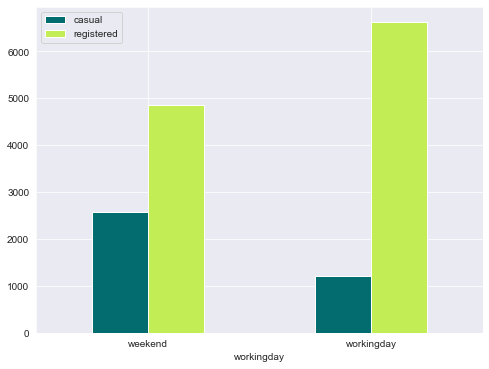

In [20]:
agg_holy = df[['casual', 'registered', 'workingday']].groupby('workingday').mean()
agg_holy.plot(kind = 'bar', figsize = (8,6), color = ['#026c6e', '#c2ed55']) 
plt.xticks(range(2), ['weekend', 'workingday'], rotation = 0)

plt.show()

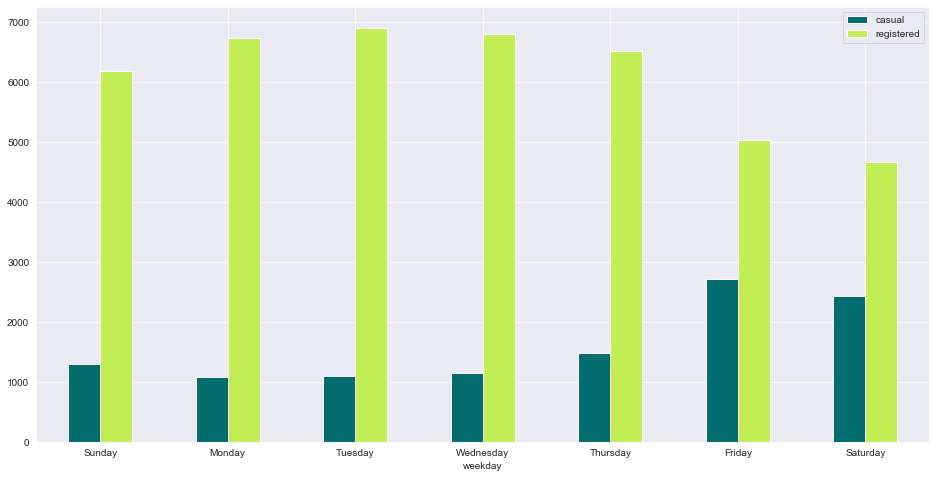

In [21]:
agg_work = df[['casual', 'registered', 'weekday']].groupby('weekday').mean()
agg_work.plot(figsize = (16,8), kind = 'bar', color = ['#026c6e', '#c2ed55'])
plt.xticks(range(7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], rotation = 0)

plt.show()

#### Temuan

Berdasarkan analisis pertanyaan ketiga, dapat dilihat bahwa pengguna terdaftar (member) lebih banyak menggunakan sepeda pada saat hari kerja, sedangkan hari libur dan akhir pekan meningkatkan jumlah pengguna casual.

#### 4. Berapa rata-rata suhu, kecepatan angin, kelembapan, dan total peminjaman sepeda setiap bulan?

In [22]:
mnths = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

list_twhc = []

for i in range(len(mnths)):
    print(mnths[i])
    print('Mean temperature: {:0.2f}'.format(df[df['month'] == i+1]['temperature'].mean()))
    print('Mean windspeed: {:0.2f}'.format(df[df['month'] == i+1]['windspeed'].mean()))
    print('Mean humidity: {:0.2f}'.format(df[df['month'] == i+1]['humidity'].mean()))
    print('Mean casual: {:0.2f}'.format(df[df['month'] == i+1]['casual'].mean()))
    print('Mean registered: {:0.2f}'.format(df[df['month'] == i+1]['registered'].mean()))
    print('Mean total: {:0.2f}'.format(df[df['month'] == i+1]['total'].mean()))
    print('-'*34)
    list_twhc.append([mnths[i], df[df['month'] == i+1]['temperature'].mean(), df[df['month'] == i+1]['windspeed'].mean(), df[df['month'] == i+1]['humidity'].mean(), df[df['month'] == i+1]['casual'].mean(), df[df['month'] == i+1]['registered'].mean(), df[df['month'] == i+1]['total'].mean()])


January
Mean temperature: 2.72
Mean windspeed: 14.71
Mean humidity: 0.61
Mean casual: 380.18
Mean registered: 3678.41
Mean total: 4058.59
----------------------------------
February
Mean temperature: 4.66
Mean windspeed: 14.79
Mean humidity: 0.60
Mean casual: 514.41
Mean registered: 4240.58
Mean total: 4754.99
----------------------------------
March
Mean temperature: 8.18
Mean windspeed: 16.32
Mean humidity: 0.57
Mean casual: 1209.01
Mean registered: 5097.42
Mean total: 6306.43
----------------------------------
April
Mean temperature: 14.72
Mean windspeed: 15.69
Mean humidity: 0.58
Mean casual: 2299.51
Mean registered: 6657.07
Mean total: 8956.58
----------------------------------
May
Mean temperature: 20.12
Mean windspeed: 13.34
Mean humidity: 0.68
Mean casual: 2256.70
Mean registered: 7033.98
Mean total: 9290.68
----------------------------------
June
Mean temperature: 24.76
Mean windspeed: 13.47
Mean humidity: 0.64
Mean casual: 2378.34
Mean registered: 7756.27
Mean total: 10134.60

In [23]:
df_mean_month = pd.DataFrame(list_twhc, columns=['month','mean_temperature','mean_windspeed','mean_humidity','mean_casual', 'mean_member', 'mean_total'])
df_mean_month.head()

,month,mean_temperature,mean_windspeed,mean_humidity,mean_casual,mean_member,mean_total
0,January,2.718978,14.708029,0.606606,380.175182,3678.412409,4058.587591
1,February,4.656000,14.788000,0.601000,514.412000,4240.580000,4754.992000
2,March,8.182796,16.315412,0.568889,1209.010753,5097.422939,6306.433692
3,April,14.718519,15.685185,0.577000,2299.507407,6657.070370,8956.577778
4,May,20.121864,13.340502,0.676057,2256.702509,7033.982079,9290.684588


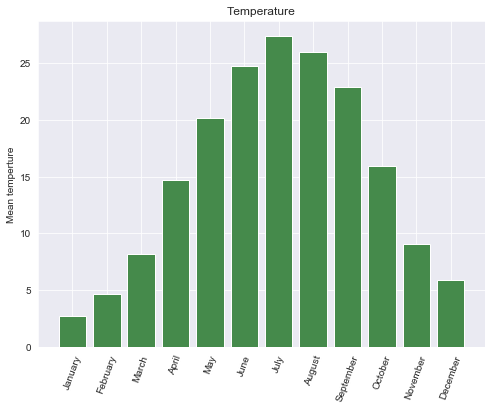

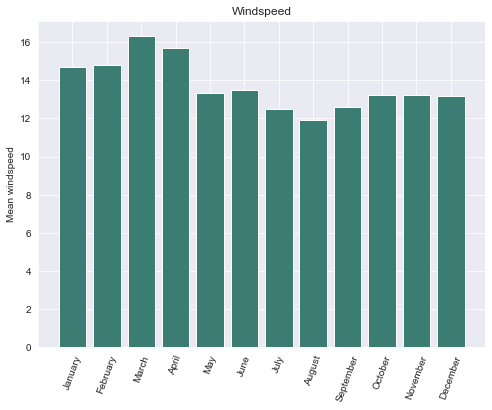

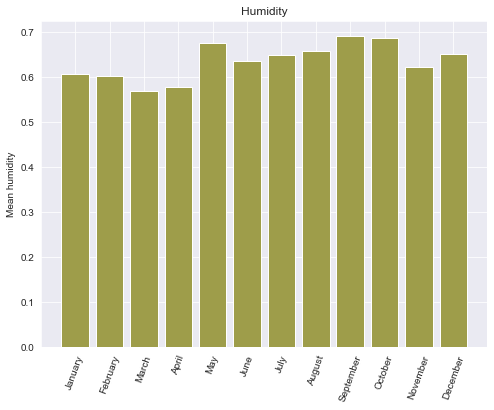

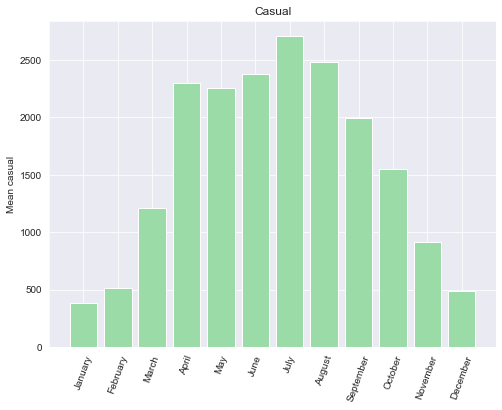

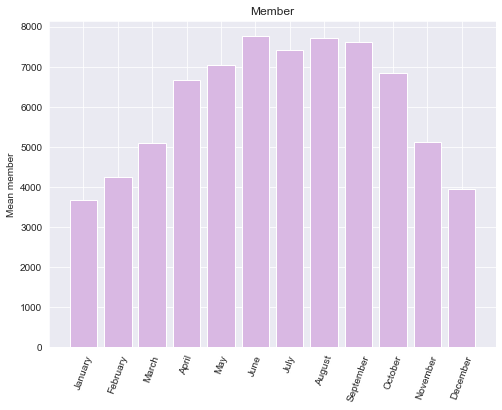

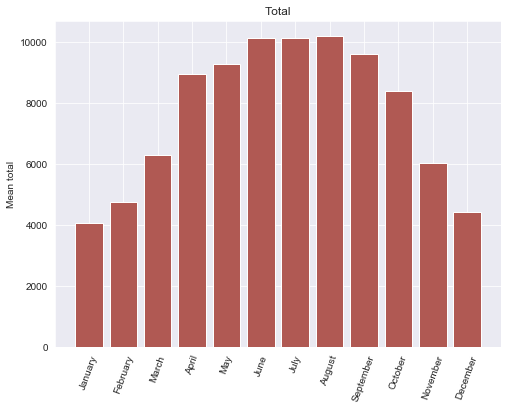

In [24]:
x_axis = np.arange(len(df_mean_month['month']))

plt.figure(figsize=(8,6))
plt.bar(x_axis, df_mean_month['mean_temperature'], color='#458a4b')
plt.xticks(x_axis, df_mean_month['month'], rotation=70)
plt.ylabel('Mean temperture')
plt.title('Temperature')

plt.figure(figsize=(8,6))
plt.bar(x_axis, df_mean_month['mean_windspeed'], color='#3b7d73')
plt.xticks(x_axis, df_mean_month['month'], rotation=70)
plt.ylabel('Mean windspeed')
plt.title('Windspeed')

plt.figure(figsize=(8,6))
plt.bar(x_axis, df_mean_month['mean_humidity'], color='#9e9d4a')
plt.xticks(x_axis, df_mean_month['month'], rotation=70)
plt.ylabel('Mean humidity')
plt.title('Humidity')

plt.figure(figsize=(8,6))
plt.bar(x_axis, df_mean_month['mean_casual'], color='#9adba7')
plt.xticks(x_axis, df_mean_month['month'], rotation=70)
plt.ylabel('Mean casual')
plt.title('Casual')

plt.figure(figsize=(8,6))
plt.bar(x_axis, df_mean_month['mean_member'], color='#d9b8e3')
plt.xticks(x_axis, df_mean_month['month'], rotation=70)
plt.ylabel('Mean member')
plt.title('Member')

plt.figure(figsize=(8,6))
plt.bar(x_axis, df_mean_month['mean_total'], color='#b05953')
plt.xticks(x_axis, df_mean_month['month'], rotation=70)
plt.ylabel('Mean total')
plt.title('Total')

plt.show()

#### Bagaimana temperature, windspeed, dan humidity mempengaruhi jumlah penyewa sepeda (member / casual)

In [25]:
def plot_it(feature, n_dec = 0):
    plot_data = df[['casual', 'registered', feature]]
    plot_data[feature] = plot_data[feature].apply(lambda x: round(x, n_dec))
    plot_data = plot_data.groupby(feature).mean().reset_index()

    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,6))
    ax1.plot(plot_data[feature], plot_data['casual'], color = '#458a4b')
    ax1.set_title('Casual')
    ax1.set_ylabel('Average user')
    ax1.set_xlabel(feature)
    
    ax2.plot(plot_data[feature], plot_data['registered'], color = '#b05953')
    ax2.set_title('Registered')
    ax2.set_ylabel('Average user')
    ax2.set_xlabel(feature)
    
    f.tight_layout()
    
    return f, (ax1, ax2), plot_data

C:\Users\EN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


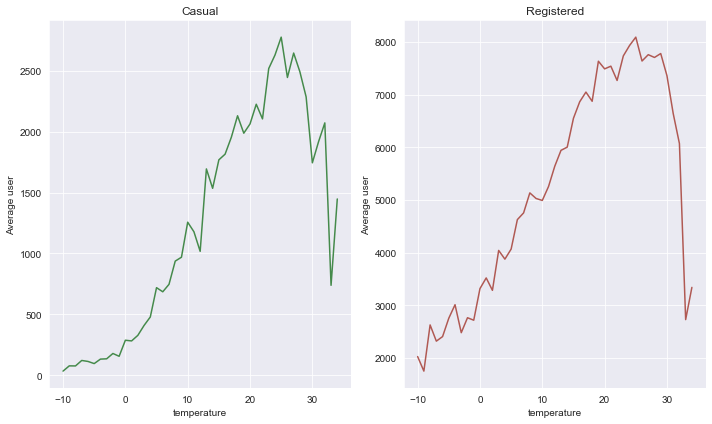

In [26]:
plot_it('temperature')
plt.show()

C:\Users\EN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


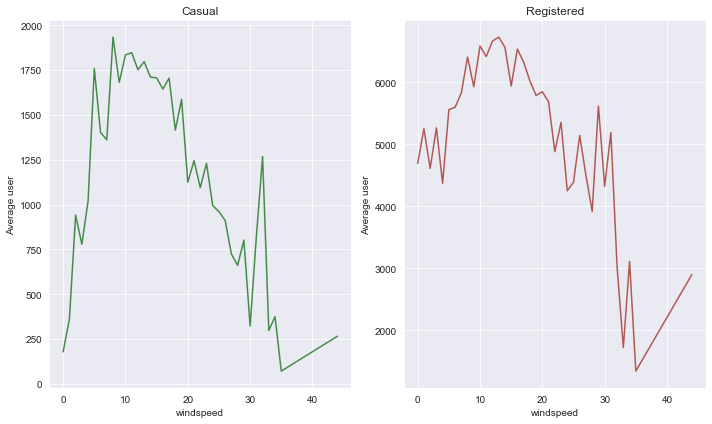

In [27]:
plot_it('windspeed')
plt.show()

C:\Users\EN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


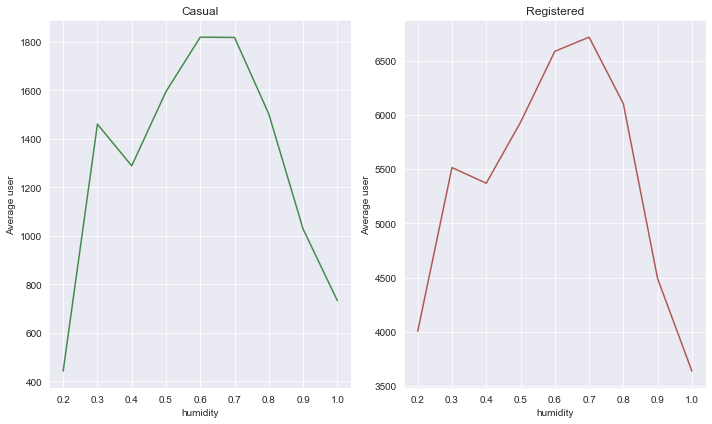

In [28]:
plot_it('humidity', n_dec=1)
plt.show()

#### Temuan

Berdasarkan analisis pada tahap ini, secara umum ketika temperature naik, maka jumlah sepeda yang disewa perbulan juga naik. Hal ini sekaligus dapat memperlihatkan korelasi yang tinggi antara temperature dan jumlah sepeda yang disewa. Sedangkan windspeed dan humidity dari bulan ke bulan nilainya hampir konstan dan korelasinya dengan jumlah sepeda yang disewa masih belum cukup jelas (mungkin jumlah sepeda yang disewa independen terhadap dua variabel tersebut).

-----

Karena pada describe, nilai terkecil pada feature total adalah 21, maka di sini akan dilihat apa yang terjadi

In [29]:
df[df['total'] == 21]

,date,month,year,holiday,workingday,weekday,season,temperature,windspeed,humidity,casual,registered,total
770,2012-10-29,10,2012,0,1,0,3,9,24,0.88,2,19,21


Setelah melakukan pencarian di internet, pada tanggal 29 Oktober 2012 terjadi Badai Sandy di Washington D.C. jumlah penyewa sedikit sudah bisa dipastikan karena adanya kejadian tersebut. Sumber: https://www.weather.gov/mhx/Oct292012EventReview, https://en.wikipedia.org/wiki/Effects_of_Hurricane_Sandy_in_Maryland_and_Washington,_D.C.

In [30]:
print(df['casual'].max())
print(df['registered'].max())
print(df['total'].max())

10173
15419
19113


In [31]:
df[df['casual'] == 10173]

,date,month,year,holiday,workingday,weekday,season,temperature,windspeed,humidity,casual,registered,total
2389,2017-04-15,4,2017,0,0,5,1,18,10,0.66,10173,6723,16896


In [32]:
df[df['registered'] == 15419]

,date,month,year,holiday,workingday,weekday,season,temperature,windspeed,humidity,casual,registered,total
2985,2018-12-03,12,2018,0,1,0,4,12,16,0.63,935,15419,16354


In [33]:
df[df['total'] == 19113]

,date,month,year,holiday,workingday,weekday,season,temperature,windspeed,humidity,casual,registered,total
2753,2018-04-14,4,2018,0,0,5,1,23,21,0.52,10039,9074,19113


In [34]:
print('casual:', df[(df['temperature'] > 10) & (df['windspeed'] < 25)]['casual'].mean())
print('registered:', df[(df['temperature'] > 10) & (df['windspeed'] < 25)]['registered'].mean())
print('total:', df[(df['temperature'] > 10) & (df['windspeed'] < 25)]['total'].mean())

casual: 2142.7917059377946
registered: 7201.223374175306
total: 9344.0150801131


In [35]:
print('casual:', df[(df['temperature'] < 10) & (df['windspeed'] > 25)]['casual'].mean())
print('registered:', df[(df['temperature'] < 10) & (df['windspeed'] > 25)]['registered'].mean())
print('total:', df[(df['temperature'] < 10) & (df['windspeed'] > 25)]['total'].mean())

casual: 366.56060606060606
registered: 3810.742424242424
total: 4177.30303030303


Dari eksplorasi data mengenai berapa temperature dan berapa windspeed pada data pengguna terbesar dapat diperkirakan bahwa hari yang cukup baik untuk bersepeda adalah saat temperature lebih dari 10°C dan windspeed kurang dari 25 km/h. Mungkin hal ini dapat dijadikan salah satu pertimbangan ketika akan membuka station penyewaan sepeda baru di kota/negara bagian lain (dengan menghitung rata-rata temperature dan rata-rata windspeed).

### Sumber Data untuk Final Project
------

#### Capital Bike Sharing (data utama)
Capital Bikeshare is metro DC's bikeshare system, with more than 4,300 bikes available at 500 stations across six jurisdictions: Washington, DC; Arlington, VA; Alexandria, VA; Montgomery County, MD; Prince George's County, MD; and Fairfax County, VA. Capital Bikeshare provides residents and visitors with a convenient, fun and affordable transportation option for getting from Point A to Point B. (source: https://www.capitalbikeshare.com/about)

website: https://www.capitalbikeshare.com/<br>
data: https://s3.amazonaws.com/capitalbikeshare-data/index.html

#### Freemeteo (informasi cuaca)
Weather forecasts, real time weather observations, historical data. 

Our weather system produces and provides detailed weather forecasts for all regions of our planet - both land and sea – tailored to the individual needs of people who require daily updates. More than 11 million geographic locations are investigated and detailed weather forecasts are produced, updated twice daily. Weather reports from thousands of certified online stations around the world are presented in real time providing accurate information on local weather conditions. Live satellite images, local or global weather maps and historical data are all available on our pages.

Our goals are global reach and indiscriminative quality of service for all communities or individuals. The width of our vision, the equitable treatment of inhabited and uninhabited or densely and sparsely populated regions of this planet makes up our profile.

website: https://freemeteo.com

#### DC Department of Human Resources (informasi tanggal libur di DC)
2019: https://dchr.dc.gov/page/holiday-schedules<br>
2018: https://dchr.dc.gov/page/holiday-schedules-2018<br>
2017 & 2016: https://dchr.dc.gov/page/holiday-schedules-2016-and-2017<br>
2015 & 2014: https://dchr.dc.gov/page/holiday-schedules-2014-and-2015<br>
2013 & 2012: https://dchr.dc.gov/page/holiday-schedules-2012-and-2013<br>
2011 & 2010: https://dchr.dc.gov/page/holiday-schedules-2010-and-2011<br>

website dchr: https://dchr.dc.gov/<br>
website dc gov: https://dc.gov/

#### National Centers for Environmental Information (informasi musim di AS)
source: https://www.ncei.noaa.gov/news/meteorological-versus-astronomical-seasons<br>
website: https://www.ncei.noaa.gov/